In [1]:
import os
import matplotlib.pyplot as plt


class gradeDataFile:
    name : str
    data : list
    
def searchFileFormat(path, fileformats):
    filesToDo = []
    for root, dirs, files in os.walk(path):
        for file in files:
            for fileformat in fileformats:
                if file.endswith(fileformat):
                    #code to generate a list of paths of files to generate logs for
                    filesToDo.append(os.path.join(root, file).split(path)[1])
    return filesToDo

def readFile(path):
    file = open(path, "r")
    filecontents = file.read()
    file.close()
    return filecontents



In [16]:
folderToSearch = "C:\\Users\\Mcall\\Desktop\\graderOutput"

filesToUse = searchFileFormat(folderToSearch, [".txt"])
grades = []
for file in filesToUse:
    currentGrade = gradeDataFile()
    currentGrade.name = file.split(".")[0].split("\\")[-1]
    currentGrade.data = []

    filecontents = readFile(folderToSearch + file)

    #code to parse the filecontents into a list of gradeDataFile objects
    #example of filecontents: 
    """\2|30.113801956176758
    \4|30.236745834350586"""

    for line in filecontents.splitlines():
        if line.startswith("\\"):
            currentGrade.data.append(line.split("|")[1])
    if len(currentGrade.data) > 1:
        grades.append(currentGrade)
    
            

In [17]:
#get the total number of grades
totalGrades = 0
for grade in grades:
    totalGrades += len(grade.data)
print ("Total number of grades: " + str(totalGrades))
totalGradesminus1each = totalGrades - len(grades)
print ("Total number of grades minus 1 each: " + str(totalGradesminus1each))
print("Total Files Used " + str(len(filesToUse)))

#get the average amount of grades per file exluding files with only 1 grade

averageGradesPerFile = totalGradesminus1each / len(filesToUse)
print ("Average number of grades per file: " + str(averageGradesPerFile))

#median amout of grades per file
medianGradesPerFile = len(grades[len(grades) // 2].data)
print ("Median number of grades per file: " + str(medianGradesPerFile))

#Q3 amount of grades per file
q3GradesPerFile = len(grades[len(grades) // 4 * 3].data)
print ("Q3 number of grades per file: " + str(q3GradesPerFile))

Total number of grades: 299213
Total number of grades minus 1 each: 272574
Total Files Used 26639
Average number of grades per file: 10.232140846127857
Median number of grades per file: 2
Q3 number of grades per file: 2


In [13]:
def diffGet(gap, printChk = False):
    #check how many sucessive grades are higher than the previous one
    higher = 0
    lower = 0
    same = 0
    totalOfHigherScores = 0
    totalOfLowerScores = 0

    avgDiffLower = []
    avgDiffHigher = []
    for grade in grades:
        for i in range(gap, len(grade.data)):
            if len(grade.data) < gap:
                continue
            if float(grade.data[i]) > float(grade.data[i-gap]):
                
                higher += 1
                avgDiffHigher.append(float(grade.data[i]) - float(grade.data[i-gap]))
                totalOfHigherScores += float(grade.data[i])
            elif float(grade.data[i]) < float(grade.data[i-gap]):
                lower +=1
                avgDiffLower.append(float(grade.data[i]) - float(grade.data[i-gap]))
                totalOfLowerScores += float(grade.data[i])
            else :
                same += 1  
    try:
        avgHigher = sum(avgDiffHigher)/len(avgDiffHigher)
    except:
        avgHigher = 0
    try:
        avgLower = sum(avgDiffLower)/len(avgDiffLower)
    except:
        avgLower = 0
    
        
        
        
    
    if printChk:            
        print("higher: " + str(higher))
        print("lower: " + str(lower))
        print ("same: " + str(same))
        print ("higher avg: " + str(avgHigher))
        print ("lower avg: " + str(avgLower))
    
    return higher, lower, same, avgHigher, avgLower, totalOfHigherScores, totalOfLowerScores
       

In [14]:
def highLowCheck(limit, printCheck = False):
    #check if the first grade is higher than the last one
    higher = 0
    lower = 0
    same = 0
    for grade in grades:
        if len(grade.data) < limit:
            continue
        if float(grade.data[0]) < float(grade.data[-1]):
            higher += 1
        elif float(grade.data[0]) > float(grade.data[-1]):
            lower +=1
        else:
            same += 1
    if printCheck:
        print (len(grades[1].data))
        print (grades[1].data)
        print (grades[1].data[-1])
        print("higher: " + str(higher))
        print("lower: " + str(lower)) 
        print ("same: " + str(same))
    return higher, lower, same

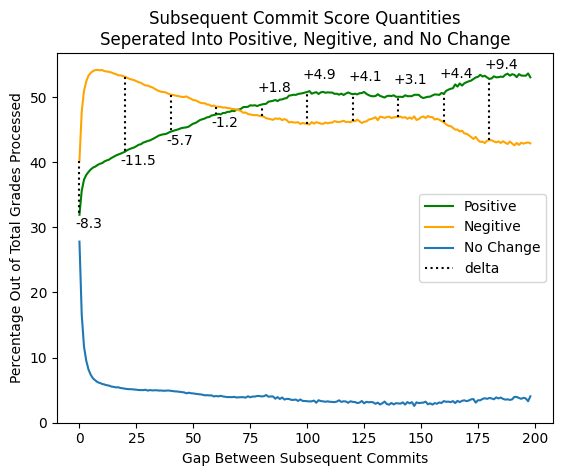

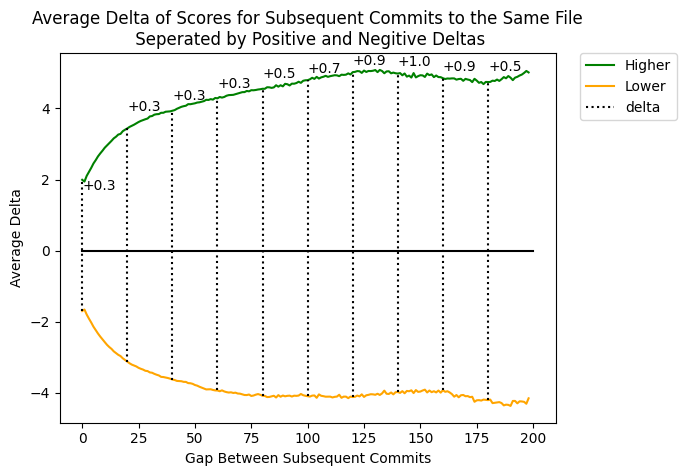

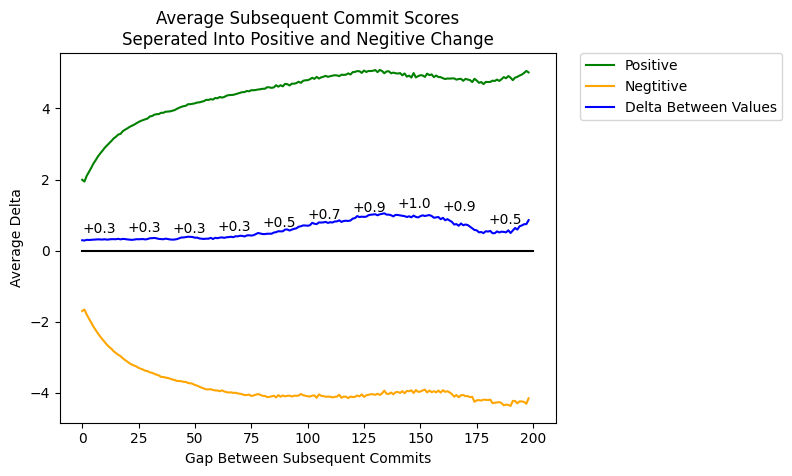

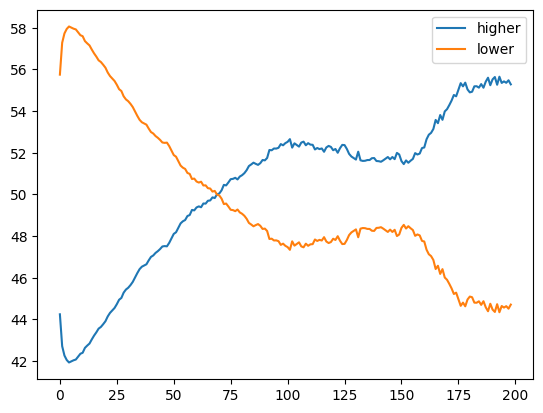

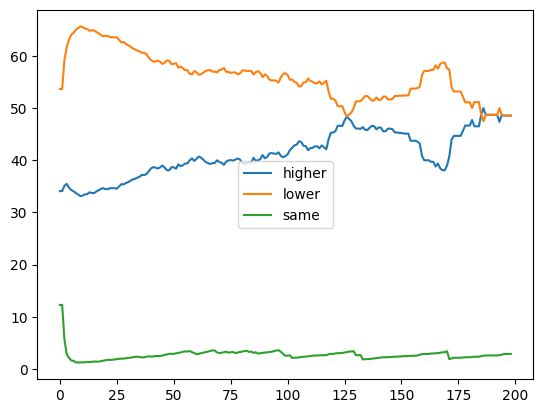

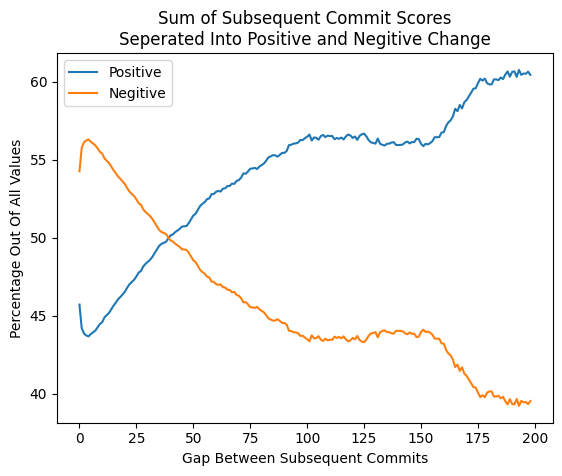

In [26]:
upperBoundForSeperations = 200



#generate graphs using results
higherOverall = []
lowerOverall = []
sameOverall = []
avgDiffHigherOverall = []
avgDiffLowerOverall = []
sameOverallPercent = []
higherOverallPercent = []
lowerOverallPercent = []
higherNonSamePrecent = []
lowerNonSamePrecent = []
totalOfHigherScores = []
totalOfLowerScores = []

hlHigh = []
hlLow = []
hlSame = []
hlHighPrec = []
hlLowPrec = []
hlSamePrec = []
totalOfHigherScoresPrec= []
totalOfLowerScoresPrec = []



for i in (range (1,upperBoundForSeperations)):
    #create a graph for each gap
    higher, lower, same, avgDiffHigher, avgDiffLower, totalOfHighScores, totalOfLowScores = diffGet(i)
    higherOverall.append(higher)
    lowerOverall.append(lower)
    sameOverall.append(same)
    avgDiffHigherOverall.append(avgDiffHigher)
    avgDiffLowerOverall.append(avgDiffLower)
    totalOfHigherScores.append(totalOfHighScores)
    totalOfLowerScores.append(totalOfLowScores)
    
    
for i in range(0, len(totalOfHigherScores)):
    try :
        totalOfHigherScoresPrec.append(totalOfHigherScores[i]/(totalOfHigherScores[i]+totalOfLowerScores[i])*100)
    except:
        totalOfHigherScoresPrec.append(0)
    try:
        totalOfLowerScoresPrec.append(totalOfLowerScores[i]/(totalOfHigherScores[i]+totalOfLowerScores[i])*100)
    except:
        totalOfLowerScoresPrec.append(0)

for i in range(0, len(higherOverall)):
    #make a chat which tracks the presentage of higher, lower and same grades across each gap
    try:
        higherOverallPercent.append(higherOverall[i]/(higherOverall[i]+lowerOverall[i]+sameOverall[i])*100)
    except:
        higherOverallPercent.append(0)
    try:
        lowerOverallPercent.append(lowerOverall[i]/(higherOverall[i]+lowerOverall[i]+sameOverall[i])*100)
    except:
        lowerOverallPercent.append(0)
    try:
        sameOverallPercent.append(sameOverall[i]/(higherOverall[i]+lowerOverall[i]+sameOverall[i])*100)
    except:
        sameOverallPercent.append(0)
    try :
        higherNonSamePrecent.append(higherOverall[i]/(higherOverall[i]+lowerOverall[i])*100)
    except:
        higherNonSamePrecent.append(0)
    try:
        lowerNonSamePrecent.append(lowerOverall[i]/(higherOverall[i]+lowerOverall[i])*100)
    except:
        lowerNonSamePrecent.append(0)
    
    
for i in range(1, upperBoundForSeperations):
    higher, lower, same = highLowCheck(i)
    hlHigh.append(higher)
    hlLow.append(lower)
    hlSame.append(same)
    try:
        hlHighPrec.append((higher / (higher + lower + same))*100)
    except:
        hlHighPrec.append(0)
    try:
        hlLowPrec.append((lower / (higher + lower + same))*100)
    except:
        hlLowPrec.append(0)
    try:
        hlSamePrec.append((same / (higher + lower + same))*100)
    except:
        hlSamePrec.append(0)
    

plt.plot(higherOverallPercent, label = "Positive", color = "green")
plt.plot(lowerOverallPercent, label = "Negitive", color = "orange")
plt.plot(sameOverallPercent, label = "No Change")
#Add title and labels
plt.title("Subsequent Commit Score Quantities\nSeperated Into Positive, Negitive, and No Change")
#come up with better name
plt.xlabel("Gap Between Subsequent Commits")
plt.ylabel("Percentage Out of Total Grades Processed")

#create a the delta lines like below
interval = 20

for i in range(0, len(higherOverallPercent), interval):
    #ylocation = (higherOverallPercent[i] + lowerOverallPercent[i]) / 2
    #if (abs(higherOverallPercent[i] - lowerOverallPercent[i]) < 2):
    #    ylocation = ylocation + 1
    #    print (ylocation)
    #ylocation will be the loewr of the two values
    currentIteration = i/interval
    nextIValue = i + interval
    if (nextIValue >= len(higherOverallPercent)):
        nextIValue = i
    ylocation = higherOverallPercent[i] - 2
    if (higherOverallPercent[i] > lowerOverallPercent[i]):
        ylocation = higherOverallPercent[i] + 2
        if (higherOverallPercent[i] == higherOverallPercent[nextIValue]):
            ylocation = higherOverallPercent[i] + 2
            
    if (currentIteration == 8):
        ylocation += .5
    if (currentIteration == 9):
        ylocation -= .5
    #if (min(higherOverallPercent[i], lowerOverallPercent[i]) > min(higherOverallPercent[nextIValue], lowerOverallPercent[nextIValue]) and i != nextIValue):
    #    ylocation = min(higherOverallPercent[i+interval], lowerOverallPercent[i+interval]) - 2
    xlocation = i -2
    numberString = str(round(higherOverallPercent[i] - lowerOverallPercent[i] ,1))
    if (higherOverallPercent[i] - lowerOverallPercent[i] > 0):
        numberString = "+" + numberString
    #subtract the size of the string from the x location to make it draw on the right spot
    
    #if (i != 0):
    #    xlocation = xlocation - (len(numberString)*3)
    plt.annotate((numberString) , (xlocation, ylocation))
    if i !=0:
        plt.plot([i, i], [lowerOverallPercent[i], higherOverallPercent[i]], color = 'black', linestyle = 'dotted')
    else:
        plt.plot([i, i], [lowerOverallPercent[i], higherOverallPercent[i]], color = 'black', linestyle = 'dotted', label = "delta")


plt.legend()
plt.show()


plt.plot(avgDiffHigherOverall, label = "Higher", color = "green")
plt.plot(avgDiffLowerOverall, label = "Lower", color = "orange")
#Draw a line at 0
plt.plot([0, upperBoundForSeperations], [0, 0], color = 'black')
#label the graph at every 10th point and add a dotted line on the x axis
for i in range(0, len(avgDiffHigherOverall), interval):
    currentIteration = i/interval
    #plt.annotate(str(round(avgDiffHigherOverall[i],1)), (i, avgDiffHigherOverall[i]+3))
    #plt.annotate(str(round(avgDiffLowerOverall[i],1)), (i, avgDiffLowerOverall[i]-3))
    ylocation = avgDiffHigherOverall[i] + .2
    if (currentIteration <5 or currentIteration == 9):
        ylocation = avgDiffHigherOverall[i] + .3
    if (currentIteration == 1):
        ylocation = avgDiffHigherOverall[i] + .5
    

    if (currentIteration == 0):
        ylocation = avgDiffHigherOverall[i] -.3
        
    

    plt.annotate("+" + str(round(avgDiffHigherOverall[i]+avgDiffLowerOverall[i], 1)), (i, ylocation))
    if i != 0:
        plt.plot([i, i], [avgDiffLowerOverall[i], avgDiffHigherOverall[i]], linestyle='dotted', color = 'black')
    else:
        plt.plot([i, i], [avgDiffLowerOverall[i], avgDiffHigherOverall[i]], linestyle='dotted', color = 'black', label = "delta")
#put the legend in the top right but down in order to not cover the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Gap Between Subsequent Commits")
plt.title("Average Delta of Scores for Subsequent Commits to the Same File\n Seperated by Positive and Negitive Deltas")
plt.ylabel("Average Delta")

plt.show()
avgDiffDelta = []
plt.plot(avgDiffHigherOverall, label = "Positive", color = "green")
plt.plot(avgDiffLowerOverall, label = "Negtitive", color = "orange")
plt.plot([0, upperBoundForSeperations], [0, 0], color = 'black')

#Draw a line representing the delta between the two lines
for i in range(0, len(avgDiffHigherOverall)):
    avgDiffDelta.append(avgDiffHigherOverall[i] + avgDiffLowerOverall[i])
plt.plot(avgDiffDelta, label = "Delta Between Values", color = "blue")

#label the graph at every 10th point and add a dotted line on the x axis
for i in range(0, len(avgDiffHigherOverall), interval):
    currentIteration = i/interval
    #plt.annotate(str(round(avgDiffHigherOverall[i],1)), (i, avgDiffHigherOverall[i]+3))
    #plt.annotate(str(round(avgDiffLowerOverall[i],1)), (i, avgDiffLowerOverall[i]-3))
    ylocation = avgDiffDelta[i] + .2
        
    

    plt.annotate("+" + str(round(avgDiffHigherOverall[i]+avgDiffLowerOverall[i], 1)), (i, ylocation))

#put the legend in the top right but down in order to not cover the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Gap Between Subsequent Commits")
plt.title("Average Subsequent Commit Scores\nSeperated Into Positive and Negitive Change")
plt.ylabel("Average Delta")

plt.show()

plt.plot(higherNonSamePrecent, label = "higher")
plt.plot(lowerNonSamePrecent, label = "lower")
plt.legend()
plt.show()

plt.plot(hlHighPrec, label = "higher")
plt.plot(hlLowPrec, label = "lower")
plt.plot(hlSamePrec, label = "same")
plt.legend()
plt.show()


plt.plot(totalOfHigherScoresPrec, label = "Positive")
plt.plot(totalOfLowerScoresPrec, label = "Negitive")
plt.title("Sum of Subsequent Commit Scores\nSeperated Into Positive and Negitive Change")
plt.xlabel("Gap Between Subsequent Commits")
plt.ylabel("Percentage Out Of All Values")
plt.legend()
plt.show()
